## Exercicios

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression #
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [58]:
dataset = pd.read_csv("datasets/diabetes_prediction_dataset.csv")

In [14]:
dataset.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
dataset.smoking_history.value_counts(normalize=True)

No Info        0.35816
never          0.35095
former         0.09352
current        0.09286
not current    0.06447
ever           0.04004
Name: smoking_history, dtype: float64

In [15]:
dataset[dataset.age < 1]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
155,Female,0.08,0,0,No Info,14.43,6.5,160,0
218,Female,0.56,0,0,No Info,16.85,5.0,140,0
241,Male,0.88,0,0,No Info,17.49,6.0,140,0
268,Female,0.16,0,0,No Info,12.15,6.6,100,0
396,Male,0.16,0,0,No Info,14.35,6.5,126,0
...,...,...,...,...,...,...,...,...,...
99452,Male,0.32,0,0,No Info,15.93,5.7,100,0
99536,Female,0.40,0,0,No Info,16.66,3.5,140,0
99629,Female,0.64,0,0,No Info,17.58,6.1,140,0
99778,Female,0.32,0,0,No Info,12.26,5.8,126,0


In [16]:
dataset[(dataset.age < 1) & (dataset.smoking_history == 'current')]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
54981,Male,0.32,0,0,current,15.17,4.0,100,0


In [18]:
dataset[(dataset.age < 1)].smoking_history.value_counts(normalize=True) * 100

No Info        94.840834
never           4.061471
not current     0.987925
current         0.109769
Name: smoking_history, dtype: float64

In [19]:
dataset.shape

(100000, 9)

In [30]:
dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# Onehot encoder

In [20]:
dataset.drop(columns=["gender", "smoking_history"], inplace=True)

In [29]:
dataset.diabetes.value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

In [21]:
dataset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0


In [46]:
X, y = dataset.drop(columns=['diabetes']), dataset['diabetes']

In [47]:
X[:10]

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
5,20.0,0,0,27.32,6.6,85
6,44.0,0,0,19.31,6.5,200
7,79.0,0,0,23.86,5.7,85
8,42.0,0,0,33.64,4.8,145
9,32.0,0,0,27.32,5.0,100


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LogisticRegression()

In [50]:
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
y_pred = model.predict(X_test)

In [28]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
accuracy_score(y_test, y_pred)

0.95875

In [38]:
y_pred_baseline = np.zeros(y_test.shape[0])

In [39]:
y_pred_baseline[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
accuracy_score(y_test, y_pred)

0.95875

In [32]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[18127,   165],
       [  660,  1048]])

/tmp/ipykernel_17906/4136354428.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data / data.astype(np.float).sum(axis=1)


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

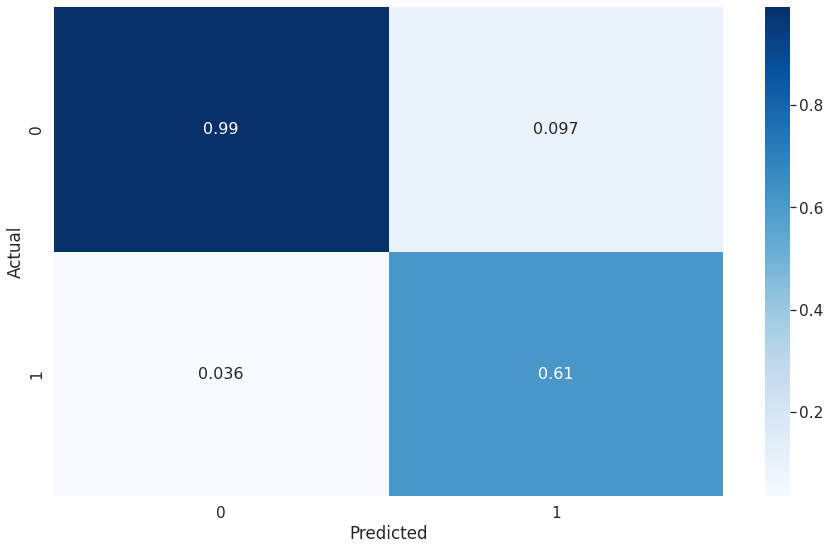

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt 

data = confusion_matrix(y_test, y_pred)
data = data / data.astype(np.float).sum(axis=1)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,9))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

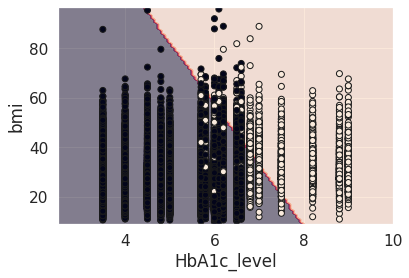

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import DecisionBoundaryDisplay

X = X[["HbA1c_level", "bmi"]]
classifier = LogisticRegression().fit(X, y)
disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method="predict",
    xlabel=X.columns[0], ylabel=X.columns[1],
    alpha=0.5,
)


le = LabelEncoder()
colors = le.fit_transform(y)
disp.ax_.scatter(X["HbA1c_level"], X["bmi"], c=list(colors), edgecolor="k")
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred_baseline)

0.0

In [57]:
print(classification_report(y_test, y_pred_baseline))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96     18292
           1       0.00      0.00      0.00      1708

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.91      0.87     20000



/home/joelson/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joelson/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/joelson/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
X, y = dataset.drop(columns=['diabetes']), dataset['diabetes']

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'

In [177]:
from sklearn.preprocessing import OneHotEncoder

columns_cat = dataset.select_dtypes(include=['object']).columns
columns_cat

Index(['gender', 'smoking_history'], dtype='object')

In [178]:
encoder = OneHotEncoder(sparse=False)

In [179]:
X, y = dataset.drop(columns=["diabetes"]), dataset["diabetes"]

In [180]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [182]:
X_train_encoder = encoder.fit_transform(X_train[columns_cat])

In [183]:
data_train = pd.DataFrame(X_train_encoder, columns=encoder.get_feature_names_out(columns_cat), index=range(X_train_encoder.shape[0]))

In [184]:
data_train.head()

,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [185]:
data_train.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)

In [186]:
X_train.drop(columns=["gender", "smoking_history"], inplace=True)

In [187]:
X_train_encoder_df = pd.concat([X_train, data_train], axis=1)
X_train_encoder_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,73.0,0,0,24.77,3.5,80,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,0,0,24.60,5.7,145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38.0,0,0,24.33,4.0,158,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,26.0,0,0,18.87,5.0,100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,61.0,1,0,22.11,4.5,85,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [188]:
X_train_encoder_df.shape

(80000, 15)

In [189]:
model = LogisticRegression()
model.fit(X_train_encoder_df, y_train)

/home/joelson/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [190]:
X_test_encoded = encoder.transform(X_test[columns_cat])
data_test = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(columns_cat), index=range(X_test_encoded.shape[0]))
data_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test.drop(columns=["gender", "smoking_history"], inplace=True)
X_test_encoder_df = pd.concat([X_test, data_test], axis=1)

In [194]:
y_pred = model.predict(X_test_encoder_df)

In [192]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.87      0.60      0.71      1708

    accuracy                           0.96     20000
   macro avg       0.92      0.80      0.84     20000
weighted avg       0.96      0.96      0.95     20000



## Validação Cruzada

## 1) Validação cruzada (cross validation)

**O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.**

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=700>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=700>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

In [195]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [196]:
iris = load_iris()

In [197]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [198]:
X, y = iris.data, iris.target

In [199]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [218]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9166666666666666

In [219]:
df = pd.DataFrame(data=y, columns=['classes'])
df.classes.value_counts(normalize=True)

0    0.333333
1    0.333333
2    0.333333
Name: classes, dtype: float64

In [220]:
res = cross_val_score(model, X_train, y_train, cv=5)
res.mean()

0.9666666666666666

In [206]:
res

array([1.        , 1.        , 1.        , 0.88888889, 0.94444444])

In [209]:
res = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
res.mean()

0.9630199430199429

In [221]:
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

results_cv = cross_validate(estimator=model, X=X_train, y=y_train,
                           cv=kf5, scoring="accuracy",
                           return_train_score=True, return_estimator=True)

In [222]:
df_results_cv = pd.DataFrame(results_cv)

In [223]:
df_results_cv.head()

,fit_time,score_time,estimator,test_score,train_score
0,0.045207,0.000661,LogisticRegression(max_iter=200),0.944444,0.986111
1,0.056753,0.001670,LogisticRegression(max_iter=200),0.944444,0.986111
2,0.056902,0.000788,LogisticRegression(max_iter=200),1.000000,0.972222
3,0.055753,0.001932,LogisticRegression(max_iter=200),1.000000,0.972222
4,0.037835,0.000923,LogisticRegression(max_iter=200),0.944444,0.986111


In [224]:
df_results_cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fit_time     5 non-null      float64
 1   score_time   5 non-null      float64
 2   estimator    5 non-null      object 
 3   test_score   5 non-null      float64
 4   train_score  5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


In [225]:
df_results_cv.estimator[2]

LogisticRegression(max_iter=200)

In [227]:
df_results_cv.estimator[2].predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2])

In [228]:
def plot_cv(estimator, X, y, n_splits, scoring):
    '''
    scoring: string relativa às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    display(df_result_cv[["train_score", "test_score"]].describe())
    
    # ============================
    
    print("\nDistribuição de métricas de treino:")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    
    print("\nDistribuição de métricas de teste:")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()
    
    print("\nAs duas juntas (compare a variância!):")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    sns.histplot(data=df_result_cv, x="test_score", color="orange", kde=True)
    plt.show()

,train_score,test_score
count,20.000000,20.000000
mean,0.974030,0.958036
std,0.005633,0.080545
min,0.965035,0.714286
25%,0.971831,0.968750
50%,0.971929,1.000000
75%,0.973739,1.000000
max,0.993007,1.000000



Distribuição de métricas de treino:


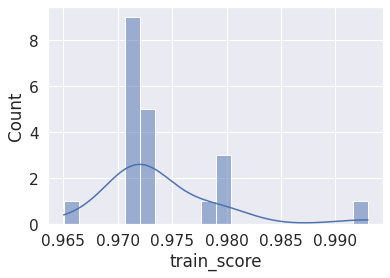


Distribuição de métricas de teste:


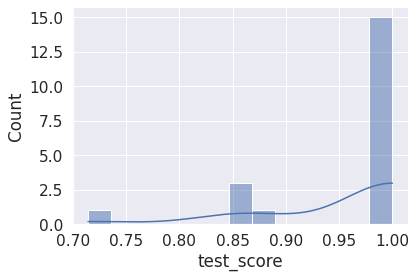


As duas juntas (compare a variância!):


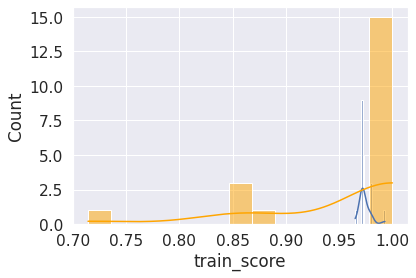

In [229]:
plot_cv(model, X, y, 20, 'accuracy')

## Escalonamento (StandardScaler)

[Breast cancer dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)

In [4]:
import pandas as pd

In [5]:
breast_cancer = pd.read_csv('datasets/breast_cancer.csv')

In [6]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
X, y = breast_cancer.drop(columns=["id", "diagnosis", "Unnamed: 32"]), breast_cancer["diagnosis"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 287 to 102
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              426 non-null    float64
 1   texture_mean             426 non-null    float64
 2   perimeter_mean           426 non-null    float64
 3   area_mean                426 non-null    float64
 4   smoothness_mean          426 non-null    float64
 5   compactness_mean         426 non-null    float64
 6   concavity_mean           426 non-null    float64
 7   concave points_mean      426 non-null    float64
 8   symmetry_mean            426 non-null    float64
 9   fractal_dimension_mean   426 non-null    float64
 10  radius_se                426 non-null    float64
 11  texture_se               426 non-null    float64
 12  perimeter_se             426 non-null    float64
 13  area_se                  426 non-null    float64
 14  smoothness_se           

In [20]:
model_no_scaler = LogisticRegression(max_iter=1000)
model_no_scaler.fit(X_train, y_train)

/home/joelson/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [23]:
X_train_scaler[:10]

array([[-0.34913849, -1.43851335, -0.41172595, -0.39047943, -1.86366229,
        -1.26860704, -0.82617052, -0.95286585, -1.72936805, -0.9415409 ,
        -0.86971355, -1.35865347, -0.83481506, -0.57230673, -0.74586846,
        -0.65398319, -0.52583524, -0.94677147, -0.53781728, -0.63449458,
        -0.54268486, -1.65565452, -0.58986401, -0.52555985, -1.51066925,
        -0.89149994, -0.75021715, -0.91671059, -0.92508585, -0.80841115],
       [-0.20468665,  0.31264011, -0.13367256, -0.27587995,  1.07807258,
         0.86354605,  0.72631375,  0.89844062,  1.17876963,  1.47437716,
        -0.04022275, -0.50962253,  0.10947722, -0.13472838, -0.52489487,
        -0.14934475,  0.07460028,  0.23747244, -0.43028253,  0.08289146,
         0.04148684,  0.68989862,  0.19412774, -0.05193356,  1.12941497,
         0.92394223,  1.22221738,  1.43655962,  1.14955889,  1.56911143],
       [-0.32931176, -0.21507235, -0.31739376, -0.36435749, -1.57987983,
        -0.45745127, -0.59730963, -0.76458843,  0

In [24]:
model_scaler = LogisticRegression()
model_scaler.fit(X_train_scaler, y_train)

LogisticRegression()

In [26]:
y_pred_no_scaler_test = model_no_scaler.predict(X_test)
y_pred_no_scaler = model_no_scaler.predict(X_test_scaler)
y_pred_scaler = model_scaler.predict(X_test_scaler)

/home/joelson/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_no_scaler_test))

              precision    recall  f1-score   support

           B       0.96      0.98      0.97        89
           M       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_scaler))

              precision    recall  f1-score   support

           B       0.99      0.98      0.98        89
           M       0.96      0.98      0.97        54

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [33]:
# y_train_model = model_no_scaler.predict(X_train)
# print(classification_report(y_train, y_train_model))

              precision    recall  f1-score   support

           B       0.96      0.97      0.97       268
           M       0.95      0.93      0.94       158

    accuracy                           0.96       426
   macro avg       0.96      0.95      0.95       426
weighted avg       0.96      0.96      0.96       426



In [30]:
breast_cancer.diagnosis.value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

## Exercício

https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn